In [1]:
import numpy as np
import random
import multiprocessing as mproc
import matplotlib.pyplot as plt
import tqdm
from tqdm.notebook import tqdm as tqdm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

import model_opt
import algo_GD
import helper

In [2]:
w_init = np.array([3,3])
_t_max = 2
f = model_opt.RosenBrock()

In [3]:
# b <= x_1 <= a , b <= x_2 <= a において一様にランダムな点をn回とり、勾配ノルムの平均を測定
helper.grad_norm(model=f,a=3,b=-3,n=10000)

1722.8777592855827

In [4]:
x = np.arange(10)
noise = helper.gauss(x)
k = helper.iqr(noise)

In [5]:
helper.student_t(x,1)

array([-1.11322397e+00, -1.30368473e+01, -7.50764655e-03,  1.32018066e+00,
       -1.72965346e+00,  7.56398636e-02, -1.29607517e+00, -7.69734975e-01,
        3.84933881e-01,  8.87777199e-01])

In [15]:
iqr_store = []
for i in range(1000):
    x = np.arange(1000)
    noise = helper.student_t(x,10)
    k = helper.iqr(noise)
    iqr_store.append(k)

AttributeError: module 'helper' has no attribute 'student_t'

(array([  5.,  13.,  62., 125., 213., 222., 175., 120.,  46.,  19.]),
 array([1.23750541, 1.26748713, 1.29746885, 1.32745056, 1.35743228,
        1.387414  , 1.41739572, 1.44737744, 1.47735916, 1.50734088,
        1.53732259]),
 <a list of 10 Patch objects>)

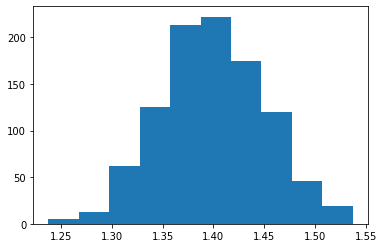

In [7]:
plt.hist(iqr_store)

In [6]:
np.mean(iqr_store) / 1.349

NameError: name 'iqr_store' is not defined

(array([102., 153., 142., 117.,  89.,  70.,  49.,  38.,  26.,  26.,  29.,
         23.,  12.,  11.,  14.,   8.,   9.,   8.,   6.,   4.,   7.,   5.,
          6.,   3.,   4.,   6.,   3.,   1.,   0.,   1.,   2.,   2.,   0.,
          2.,   1.,   3.,   3.,   1.,   1.,   2.,   1.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   2.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.05919319,  0.3065564 ,  0.5539196 ,  0.8012828 ,  1.04864601,
         1.29600921,  1.54337241,  1.79073561,  2.03809882,  2.28546202,
         2.53282522,  2.78018843,  3.02755163,  3.27491483,  3.52227803,
         3.76964124,  4.01700444,  4.26436764,  4.51173084,  4.75909405,
         5.00645725,  5.25

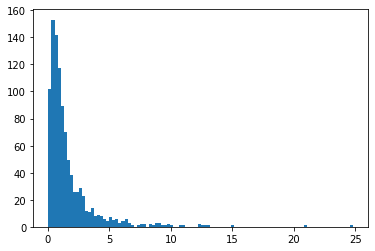

In [7]:
plt.hist(helper.log_normal(mean=0,sigma=1,w=np.arange(1000)),bins=100)

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 4.000e+00, 9.000e+00, 8.000e+00, 1.800e+01, 1.800e+01,
        1.800e+01, 3.200e+01, 3.700e+01, 5.800e+01, 6.800e+01, 8.000e+01,
        1.180e+02, 1.490e+02, 1.740e+02, 2.160e+02, 2.820e+02, 3.340e+02,
        4.630e+02, 4.770e+02, 6.240e+02, 7.200e+02, 8.400e+02, 9.960e+02,
        1.158e+03, 1.317e+03, 1.478e+03, 1.592e+03, 1.881e+03, 2.027e+03,
        2.233e+03, 2.443e+03, 2.719e+03, 2.855e+03, 3.031e+03, 3.179e+03,
        3.290e+03, 3.533e+03, 3.423e+03, 3.606e+03, 3.689e+03, 3.717e+03,
        3.705e+03, 3.681e+03, 3.519e+03, 3.369e+03, 3.195e+03, 3.049e+03,
        2.891e+03, 2.641e+03, 2.558e+03, 2.297e+03, 2.178e+03, 1.890e+03,
        1.809e+03, 1.517e+03, 1.414e+03, 1.231e+03, 1.046e+03, 9.240e+02,
        7.600e+02, 6.780e+02, 5.120e+02, 4.920e+02, 3.430e+02, 2.710e+02,
        2.600e+02, 1.910e+02, 1.650e+02, 1.250e+02, 7.900e+01, 4.600e+01,
        6.400e+01, 4.300e+01, 2.900e+0

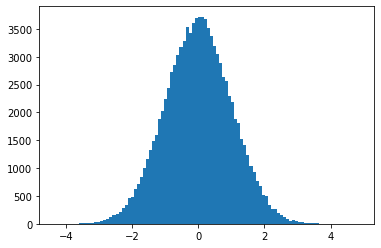

In [8]:
plt.hist(helper.student_t(w=np.arange(100000),v=10000),bins=100)


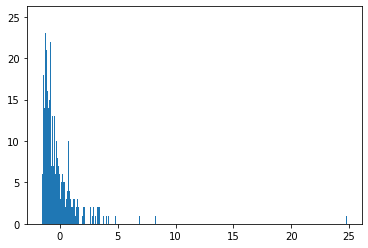

In [14]:
k = helper.lognormal(mean=0,sigma=1,w=np.arange(1000))
plt.hist(k - k.mean(),bins=1000)
plt.show()

In [ ]:
k = helper.lognormal(mean=0.1,sigma=1,w=np.arange(1000))
plt.hist(k - k.mean(),bins=1000)
plt.show()

In [ ]:
helper.iqr(k)

In [9]:
w_init = np.array([3,3])
_t_max = 3000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []
for i in range(10):
    var = np.random.randint(1,300,1)[0]
    noise = helper.gauss
    f = model_opt.RosenBrock(noise=noise,var=var)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        algo.update(model=f)
        
    iqr_store.append(helper.iqr(algo.noise_store))
    last_w_store.append(algo.w)
        

    

In [10]:
last_w_store

[array([-1.07535462,  1.08195926]),
 array([-0.06728406,  0.21109443]),
 array([-1.04351299,  1.26862383]),
 array([0.10434869, 0.11291966]),
 array([-0.12512311,  0.43234487]),
 array([0.556907  , 0.80694259]),
 array([ 0.23268692, -0.03220321]),
 array([-0.99132509,  0.29783177]),
 array([ 0.44541436, -0.01125352]),
 array([0.62022937, 0.35269991])]

In [ ]:

w_init = np.array([3,3])
_t_max = 1000
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
w_star = f.w_star
f = model_opt.RosenBrock(noise=noise,var=100)
for i in tqdm(algo):
    algo.update(model=f)
    
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [ ]:
#ノイズを記録したもの。そのIQRについて調べている。
noise_norm = np.array(algo.noise_store).flatten()
helper.iqr(noise_norm)

In [ ]:
print(k)
